In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import TransformerMixin

In [2]:
data1 = pd.read_csv("real411-election-cleaned_data.csv")
data1["class"]= 'misinformation' 

In [3]:
data1

,Unnamed: 0,title,overview,status,platform,asset_text_extracts,class
0,0,Twitter: Breach of ECC?,The complaint is about a Twitter account that ...,Resolved,Twitter,PARTY OF ACTION Political Party IEC Registere ...,misinformation
1,2,NaN,NaN,Needs More Information,WhatsApp,a 21 I 652 Naeem Patel 5 minutesag9go Happy Ga...,misinformation
2,3,Possible Voter Registration Fraud,Person complained that they were registered in...,Resolved - Out of Scope,Other,27820070059 Use OTP 517392 to proceed with you...,misinformation
3,5,NaN,NaN,Needs More Information,Other,NaN,misinformation
4,6,Twitter: Color determines the level of corrupt...,The complaint is based on a poster by the EFF ...,Resolved,Twitter,IT IS NOT CORRUPTION IF IT IS BLACK REVOLUTIONARY,misinformation
5,7,Facebook: Fake ballot papers misleading voters,Complaint is based on a candidate who could po...,Resolved,Facebook,SAMPLE BALLOT PAPER DISTRICT COUNCIL PARTY VOT...,misinformation
6,9,Whatsapp: Special vote,The complaint is based on an infographic publi...,Resolved,WhatsApp,DA Skip the lines Vote early If you are a regi...,misinformation
7,12,Twitter: Offensive DA posters,The complaint is about offensive posters that ...,Resolved,Twitter,THE ANC CALLED YOU RACISTS THE DA CALLS YOU HE...,misinformation
8,14,NaN,NaN,Not Relevant,Other,1203 3ul Vo 4G S LTE Sign in to Standard Bank ...,misinformation
9,15,NaN,NaN,Needs More Information,Other,IVERNMENTA ETIONS 2021 DE ANC 2021,misinformation


In [4]:
train_data = data1[["asset_text_extracts", "class"]]
train_data=train_data.rename(columns = {"asset_text_extracts":"tweet"})
train_data.dropna(inplace=True)
train_data

,tweet,class
0,PARTY OF ACTION Political Party IEC Registere ...,misinformation
1,a 21 I 652 Naeem Patel 5 minutesag9go Happy Ga...,misinformation
2,27820070059 Use OTP 517392 to proceed with you...,misinformation
4,IT IS NOT CORRUPTION IF IT IS BLACK REVOLUTIONARY,misinformation
5,SAMPLE BALLOT PAPER DISTRICT COUNCIL PARTY VOT...,misinformation
6,DA Skip the lines Vote early If you are a regi...,misinformation
7,THE ANC CALLED YOU RACISTS THE DA CALLS YOU HE...,misinformation
8,1203 3ul Vo 4G S LTE Sign in to Standard Bank ...,misinformation
9,IVERNMENTA ETIONS 2021 DE ANC 2021,misinformation
10,1125 81160061006393 Monday Sep 20 1545 The hol...,misinformation


In [5]:
data2 = pd.read_csv("data/vaccine_jhb/vaccine_jhb.csv",sep="\t" )
data2["tweet"][0]

"@LadyhawkAnnie The fact that nobody has attempted to steal the vaccine tells me that it has no value. Especially the thieving ANC members. If that does not convince you it's of no value.....nothing ever will."

In [6]:
data3 = pd.read_csv("covid_jhb.csv",sep="\t")

In [7]:
# Let us look at what the target names are
train_label_names = train_data["class"]
train_label_names

0     misinformation
1     misinformation
2     misinformation
4     misinformation
5     misinformation
6     misinformation
7     misinformation
8     misinformation
9     misinformation
10    misinformation
12    misinformation
13    misinformation
14    misinformation
15    misinformation
16    misinformation
17    misinformation
18    misinformation
19    misinformation
20    misinformation
21    misinformation
22    misinformation
23    misinformation
24    misinformation
25    misinformation
26    misinformation
27    misinformation
28    misinformation
29    misinformation
30    misinformation
31    misinformation
32    misinformation
Name: class, dtype: object

In [8]:
bigdata=data2.tweet.append(data3.tweet, ignore_index=True)

In [9]:
bigdata

0        @LadyhawkAnnie The fact that nobody has attemp...
1        @Newzroom405 Maybe he needs Pfizer for the spear.
2        @__Inolofatse__ Fostofol I'm not your fan, sec...
3        @SundayTimesZA Asina ndaba we trust our own na...
4        As August comes to an end we look back at 27 d...
                               ...                        
32608                                Corona emo specialeng
32609    @SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...
32610                               Hahahaha re nwa Corona
32611    @lebohang_dh Inside joke yeah but I open beer ...
32612    @Juks_Afrika @VinDollar016 @nonhlanhla_Nox It’...
Name: tweet, Length: 32613, dtype: object

In [10]:
bigdata = train_data.tweet.append(data2.tweet, ignore_index=True)

#### Let us clean our big data sample

We clean our text by Removing texts such as: 
* mentions
* URLS
* numbers
* etc.

In [11]:
from nltk.corpus import stopwords
import re

In [12]:
from nltk.stem import PorterStemmer
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [13]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [14]:
train_data_df = bigdata.apply(remove_url)
train_data_df[2]

'27820070059 Use OTP 517392 to proceed with your Online Voter Registration Service process OTP expires in 15 mins Regards IEC Use OTP 178991 to proceed with your Online Voter Registration Service process OTP expires in 15 mins Regards IEC Use OTP 266276 to proceed with your Voter Portal sign up process for 8708310096086 OTP expires in 15 mins Regards IEC Application received for ID 870831 08 on Sep 6 2021 542PM We will notify you once it has been processed Thank you for using VoterPortal Regards IEC Friday 17 September 2021 Pls upload a clearer picture of Green ID bookTemporary ID Certificate or the FRONT of your Smart card for faster processing of your voter reg applicationIEC Sunday 19 September 2021 The holder of ID number 870831 08 is registered on 06092021 in VD 43870125 at Voting Station NOGQAZA PRIMARY SCHOOL More info wwwelectionsorgza'

In [15]:
ps = PorterStemmer()
cleaned_data=[]
for i in range(0,len(train_data_df)):
    result = re.sub('[^a-zA-Z]',' ',train_data_df.iloc[i])
    tweet=re.sub('@[A-Za-z0-9_]+','',train_data_df.iloc[i])
    tweet= re.sub(r'#\w+ ?', '', train_data_df.iloc[i])
    tweet= str(train_data_df).replace("tweet", "")
    result = result.lower()
    result = result.split()
    result = [ps.stem(word) for word in result if not word in stopwords.words("english")]
    result = " ".join(result)
    cleaned_data.append(result)

In [16]:
cleaned_data 

['parti action polit parti iec register tweet take interest affair govern doom live rule fool plato poa follow parti action polit parti iec regist partyofact naturallmmun covidsurvivor savaxrecord nolockdown freedomofreligion nomedicalapartheid nomandatoryvaccin nomandatorymask south africa iii join juli follow follow n follow karabo mokgoko peter ndoro',
 'naeem patel minutesag go happi ganesh chaturthi hindu friend look team member help us make town better stop corrupt come vote count vote pleas pm your interest pleas use referr code show support youd like town councillor actionsaappr b repli',
 'use otp proceed onlin voter registr servic process otp expir min regard iec use otp proceed onlin voter registr servic process otp expir min regard iec use otp proceed voter portal sign process otp expir min regard iec applic receiv id sep pm notifi process thank use voterport regard iec friday septemb pl upload clearer pictur green id booktemporari id certif front smart card faster process 

In [17]:
train_data_df =cleaned_data 
train_data_df

['parti action polit parti iec register tweet take interest affair govern doom live rule fool plato poa follow parti action polit parti iec regist partyofact naturallmmun covidsurvivor savaxrecord nolockdown freedomofreligion nomedicalapartheid nomandatoryvaccin nomandatorymask south africa iii join juli follow follow n follow karabo mokgoko peter ndoro',
 'naeem patel minutesag go happi ganesh chaturthi hindu friend look team member help us make town better stop corrupt come vote count vote pleas pm your interest pleas use referr code show support youd like town councillor actionsaappr b repli',
 'use otp proceed onlin voter registr servic process otp expir min regard iec use otp proceed onlin voter registr servic process otp expir min regard iec use otp proceed voter portal sign process otp expir min regard iec applic receiv id sep pm notifi process thank use voterport regard iec friday septemb pl upload clearer pictur green id booktemporari id certif front smart card faster process 

In [18]:
cleaned_data = str(cleaned_data).replace("tweet", "")
cleaned_data = str(cleaned_data).replace("twitter", "")
cleaned_data=[stemmer.stem(word) for word in cleaned_data if (word not in stop_words)]
cleaned_data = bigdata

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
 bigdata, test = train_test_split(cleaned_data, test_size=0.2, shuffle=True)

In [21]:
bigdata 

9517    @lunchout2 We actually don’t need the Vaccine....
4056    @MightiJamie @NalediChirwa 48% of UK total pop...
8555    @mithisa_motho @kgomo10111 @tsholo94 Wow! This...
5153    @Bazza36141714 @ewnreporter I cant even regist...
8414    Fellow Africans Don't take the Covid-19 Vaccin...
                              ...                        
4938    We’ve had four deaths in my extended family in...
5365    People are getting tattoo but won't get vaccin...
1879    Even if everyone in south africa can take this...
7152    #VaccineforSouthAfrica Great to see our Covid ...
1904    #UJAllTheWay It is with a sad  heart that #Tea...
Name: tweet, Length: 7806, dtype: object

In [22]:
#Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [23]:
# stop words list
STOPLIST = set(stopwords.words('english') + list()) 
# special character
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”","''"]

In [24]:
# class for cleaning the text
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
            return {}

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

###  Vectorization

In [25]:
bigdata

9517    @lunchout2 We actually don’t need the Vaccine....
4056    @MightiJamie @NalediChirwa 48% of UK total pop...
8555    @mithisa_motho @kgomo10111 @tsholo94 Wow! This...
5153    @Bazza36141714 @ewnreporter I cant even regist...
8414    Fellow Africans Don't take the Covid-19 Vaccin...
                              ...                        
4938    We’ve had four deaths in my extended family in...
5365    People are getting tattoo but won't get vaccin...
1879    Even if everyone in south africa can take this...
7152    #VaccineforSouthAfrica Great to see our Covid ...
1904    #UJAllTheWay It is with a sad  heart that #Tea...
Name: tweet, Length: 7806, dtype: object

In [26]:
def initialise_term_frequency_vectorizer_ngram(data, ngram = 1):
    # Must return X- transformed text data, vectorizer - vectorizer that is fit on the data, must return for the n_gram specified
    # YOUR CODE HERE
    vectorizer_tf = TfidfVectorizer(ngram_range=(ngram,ngram)) #Initializing the CountVectorizer
    X = vectorizer_tf.fit_transform(data)
    return X, vectorizer_tf

In [27]:
def get_id2word(vocabulary):
    id2word = {}
    for key in vocabulary.keys():
        # YOUR CODE HERE
        id2word[vocabulary[key]] = key
                      
    return id2word

In [28]:
X_bigram, vectorizer_tf = initialise_term_frequency_vectorizer_ngram(bigdata, ngram=2)

In [29]:
vectorizer_tf

TfidfVectorizer(ngram_range=(2, 2))

In [30]:
bigram_counts = np.sum(X_bigram,axis=0).tolist()[0]
id2word = get_id2word(vectorizer_tf.vocabulary_)

In [31]:
id2word

{46116: 'lunchout2 we',
 87823: 'we actually',
 2602: 'actually don',
 24012: 'don need',
 51623: 'need the',
 76124: 'the vaccine',
 85086: 'vaccine we',
 87943: 'we have',
 34381: 'have the',
 74733: 'the cure',
 20856: 'cure the',
 76149: 'the virus',
 86514: 'virus mutates',
 50613: 'mutates too',
 80597: 'too quickly',
 48616: 'mightijamie naledichirwa',
 51174: 'naledichirwa 48',
 1345: '48 of',
 55172: 'of uk',
 81808: 'uk total',
 80699: 'total population',
 60376: 'population vaccinated',
 83340: 'vaccinated and',
 5774: 'and 83',
 1781: '83 of',
 54798: 'of its',
 40939: 'its adults',
 2824: 'adults in',
 38119: 'in sa',
 65680: 'sa less',
 44348: 'less than',
 73587: 'than of',
 54983: 'of population',
 83695: 'vaccinated thats',
 74302: 'thats why',
 89840: 'why eff',
 25302: 'eff events',
 26891: 'events are',
 8432: 'are super',
 72130: 'super spreaders',
 70627: 'spreaders why',
 89833: 'why do',
 23526: 'do care',
 15184: 'care so',
 69587: 'so much',
 50318: 'much how'

In [32]:
sorted_index = np.argsort(bigram_counts)[::-1]
print("Highest occuring word:%s - count:%s" % (id2word[sorted_index[0]], bigram_counts[sorted_index[0]]))
print("2nd highest occuring word:%s - count:%s" % (id2word[sorted_index[1]], bigram_counts[sorted_index[1]]))
print("3rd highest occuring word:%s - count:%s" % (id2word[sorted_index[2]], bigram_counts[sorted_index[2]]))
print("4th highest occuring word:%s - count:%s" % (id2word[sorted_index[3]], bigram_counts[sorted_index[3]]))
print("4th highest occuring word:%s - count:%s" % (id2word[sorted_index[4]], bigram_counts[sorted_index[4]]))

Highest occuring word:https co - count:123.40604275898261
2nd highest occuring word:the vaccine - count:114.42049644339511
3rd highest occuring word:of the - count:48.51862662878341
4th highest occuring word:to be - count:42.38834630731287
4th highest occuring word:get vaccinated - count:41.53407812870606


In [33]:
X_bigram

<7806x93686 sparse matrix of type '<class 'numpy.float64'>'
	with 175995 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.svm import OneClassSVM

In [35]:
# OneClassSVM algorithm
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
pipe_clf = Pipeline([('cleanText', CleanTextTransformer()),('vectorizer', vectorizer_tf), ('clf', clf)])

In [36]:
len(train_label_names)

31

In [37]:
len(cleaned_data)

9758

In [38]:
# fit OneClassSVM model 
pipe_clf.fit(cleaned_data, train_label_names)

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x0000028699791AC0>),
                ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [39]:
pipe_clf

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x0000028699791AC0>),
                ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [40]:
# validate OneClassSVM model with test set
preds_test = pipe_clf.predict(test)

In [41]:
len(preds_test)

1952

In [42]:
from sklearn.metrics import confusion_matrix, classification_report 

In [43]:
from joblib import dump, load
dump(pipe_clf, 'model/one-classSVM.joblib') 

['model/one-classSVM.joblib']

In [44]:
clf1 = load('model/one-classSVM.joblib') 

In [45]:
test = pd.read_csv("suspicious.csv")

In [46]:
test

,Unnamed: 0,username,name,tweet,category
0,0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...,accurate
1,1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.,accurate
2,2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec...",accurate
3,3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...,accurate
4,4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...,accurate
...,...,...,...,...,...
32608,32608,ndim_uchris,uTata ka Zama and others,Corona emo specialeng,accurate
32609,32609,collen_el,Collen Jay El'Padroni,@SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...,accurate
32610,32610,em_jay7,High Sauce,Hahahaha re nwa Corona,accurate
32611,32611,fana__n,FANA,@lebohang_dh Inside joke yeah but I open beer ...,accurate


In [47]:
test1 = test.tweet

In [48]:
test1 = test1.apply(remove_url)

In [49]:
test1

0        LadyhawkAnnie The fact that nobody has attempt...
1          Newzroom405 Maybe he needs Pfizer for the spear
2        Inolofatse Fostofol Im not your fan secondly o...
3        SundayTimesZA Asina ndaba we trust our own nat...
4        As August comes to an end we look back at 27 d...
                               ...                        
32608                                Corona emo specialeng
32609    SbusisoMthimkul mizarCDXX Kodwa Bafo wena imal...
32610                               Hahahaha re nwa Corona
32611    lebohangdh Inside joke yeah but I open beer wi...
32612    JuksAfrika VinDollar016 nonhlanhlaNox Its prem...
Name: tweet, Length: 32613, dtype: object

In [50]:
# test_tf = vectorizer_tf.transform(test1)

In [51]:
predictions = clf1.predict(list(test1))

In [52]:
sustest = pd.concat([test, pd.DataFrame(predictions)], axis=1)

In [53]:
sustest 

,Unnamed: 0,username,name,tweet,category,0
0,0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...,accurate,1
1,1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.,accurate,-1
2,2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec...",accurate,1
3,3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...,accurate,-1
4,4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...,accurate,-1
...,...,...,...,...,...,...
32608,32608,ndim_uchris,uTata ka Zama and others,Corona emo specialeng,accurate,1
32609,32609,collen_el,Collen Jay El'Padroni,@SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...,accurate,1
32610,32610,em_jay7,High Sauce,Hahahaha re nwa Corona,accurate,1
32611,32611,fana__n,FANA,@lebohang_dh Inside joke yeah but I open beer ...,accurate,-1


In [54]:
del sustest["Unnamed: 0"]

In [55]:
sustest.rename(columns = {0:'cat'}, inplace = True)

In [56]:
sustest

,username,name,tweet,category,cat
0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...,accurate,1
1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.,accurate,-1
2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec...",accurate,1
3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...,accurate,-1
4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...,accurate,-1
...,...,...,...,...,...
32608,ndim_uchris,uTata ka Zama and others,Corona emo specialeng,accurate,1
32609,collen_el,Collen Jay El'Padroni,@SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...,accurate,1
32610,em_jay7,High Sauce,Hahahaha re nwa Corona,accurate,1
32611,fana__n,FANA,@lebohang_dh Inside joke yeah but I open beer ...,accurate,-1


In [57]:
cat_list = []
for item in sustest.cat:
    if item == -1:
        Class = "Not verified"
    else:
        Class = "Misinformation"
    cat_list.append(Class)


In [58]:
 sustest["Class"] = cat_list

In [59]:
 sustest['Class'].value_counts()

Not verified      19489
Misinformation    13124
Name: Class, dtype: int64

C:\Users\Mohlatlego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

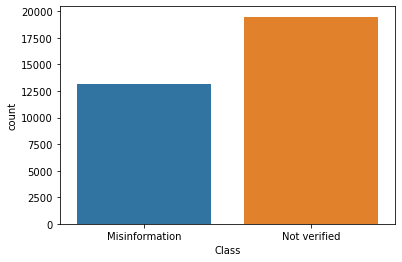

In [60]:
sns.countplot( sustest['Class'])

In [61]:
sustest.value_counts(['Class', 'category']) 

Class           category  
Not verified    accurate      19019
Misinformation  accurate      12811
Not verified    suspicious      470
Misinformation  suspicious      313
dtype: int64

<AxesSubplot:xlabel='Class,category'>

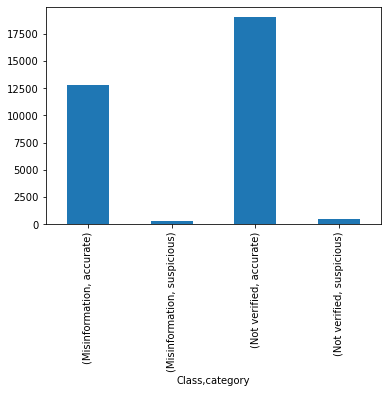

In [62]:
(sustest
 .groupby(['Class', 'category'])
 .size()
 .plot.bar()
)

In [69]:
sustest["tweet"].loc[sustest['Class']=="Not verified"][5]

'@Discovery_SA is it possible to obtain a vaccine certificate from the Covid19 portal? I came across this and I’ve tried navigating the site but can’t seem to locate the certificate. Please advise.  https://t.co/rAKvU1sgOT'